In [2]:
#忽略警告提示
import warnings
warnings.filterwarnings('ignore')

#导入处理数据包
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import re
import nltk
import os
import gensim

#英文停用词库
from nltk.corpus import stopwords 
stop = set(stopwords.words('english'))

#词干提取库
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

#词形还原
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

#LDA
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

#导入路径
"""
path:文件夹路径
file_list:要打开的文件的路径
"""
path = 'D:/AIdatum/assessment/DMIR/Practice1/Large Movie Review Dataset/aclImdb/train/real_train'
file_list = os.listdir(''r''+path)
i = 0
all_list = []
for file in file_list:
    with open(path+ '/' + file, 'r') as f:
        text = f.read()
        
        i += 1
        print('第',i,'篇评论',i)
        
        pre_process(text,i,all_list)

第 1 篇评论 1
第 2 篇评论 2
第 3 篇评论 3
第 4 篇评论 4
第 5 篇评论 5
第 6 篇评论 6
第 7 篇评论 7
第 8 篇评论 8
第 9 篇评论 9
第 10 篇评论 10
第 11 篇评论 11
第 12 篇评论 12
第 13 篇评论 13
第 14 篇评论 14
第 15 篇评论 15
第 16 篇评论 16
第 17 篇评论 17
第 18 篇评论 18
第 19 篇评论 19
第 20 篇评论 20
第 21 篇评论 21
第 22 篇评论 22
第 23 篇评论 23
第 24 篇评论 24
第 25 篇评论 25
第 26 篇评论 26
第 27 篇评论 27
第 28 篇评论 28
第 29 篇评论 29
第 30 篇评论 30
第 31 篇评论 31
第 32 篇评论 32
第 33 篇评论 33
第 34 篇评论 34
第 35 篇评论 35
第 36 篇评论 36
第 37 篇评论 37
第 38 篇评论 38
第 39 篇评论 39
第 40 篇评论 40
第 41 篇评论 41
第 42 篇评论 42
第 43 篇评论 43
第 44 篇评论 44
第 45 篇评论 45
第 46 篇评论 46
第 47 篇评论 47
第 48 篇评论 48
第 49 篇评论 49
第 50 篇评论 50
第 51 篇评论 51
第 52 篇评论 52
第 53 篇评论 53
第 54 篇评论 54
第 55 篇评论 55
第 56 篇评论 56
第 57 篇评论 57
第 58 篇评论 58
第 59 篇评论 59
第 60 篇评论 60
第 61 篇评论 61
第 62 篇评论 62
第 63 篇评论 63
第 64 篇评论 64
第 65 篇评论 65
第 66 篇评论 66
第 67 篇评论 67
第 68 篇评论 68
第 69 篇评论 69
第 70 篇评论 70
第 71 篇评论 71
第 72 篇评论 72
第 73 篇评论 73
第 74 篇评论 74
第 75 篇评论 75
第 76 篇评论 76
第 77 篇评论 77
第 78 篇评论 78
第 79 篇评论 79
第 80 篇评论 80
第 81 篇评论 81
第 82 篇评论 82
第 83 篇评论 83
第 84 篇评论 84
第 85 篇评论 8

第 606 篇评论 606
第 607 篇评论 607
第 608 篇评论 608
第 609 篇评论 609
第 610 篇评论 610
第 611 篇评论 611
第 612 篇评论 612
第 613 篇评论 613
第 614 篇评论 614
第 615 篇评论 615
第 616 篇评论 616
第 617 篇评论 617
第 618 篇评论 618
第 619 篇评论 619
第 620 篇评论 620
第 621 篇评论 621
第 622 篇评论 622
第 623 篇评论 623
第 624 篇评论 624
第 625 篇评论 625
第 626 篇评论 626
第 627 篇评论 627
第 628 篇评论 628
第 629 篇评论 629
第 630 篇评论 630
第 631 篇评论 631
第 632 篇评论 632
第 633 篇评论 633
第 634 篇评论 634
第 635 篇评论 635
第 636 篇评论 636
第 637 篇评论 637
第 638 篇评论 638
第 639 篇评论 639
第 640 篇评论 640
第 641 篇评论 641
第 642 篇评论 642
第 643 篇评论 643
第 644 篇评论 644
第 645 篇评论 645
第 646 篇评论 646
第 647 篇评论 647
第 648 篇评论 648
第 649 篇评论 649
第 650 篇评论 650
第 651 篇评论 651
第 652 篇评论 652
第 653 篇评论 653
第 654 篇评论 654
第 655 篇评论 655
第 656 篇评论 656
第 657 篇评论 657
第 658 篇评论 658
第 659 篇评论 659
第 660 篇评论 660
第 661 篇评论 661
第 662 篇评论 662
第 663 篇评论 663
第 664 篇评论 664
第 665 篇评论 665
第 666 篇评论 666
第 667 篇评论 667
第 668 篇评论 668
第 669 篇评论 669
第 670 篇评论 670
第 671 篇评论 671
第 672 篇评论 672
第 673 篇评论 673
第 674 篇评论 674
第 675 篇评论 675
第 676 篇评论 676
第 677 

## note

**re.compile()**:
用于编译正则表达式模式，并返回一个可重用的正则表达式对象

'<','>':表示匹配这两个字符本身

'.':表示匹配任意字符

'* ':表示匹配前面的字符零次或多次

'?':表示匹配前面的字符尽可能少，即当出现'<<'时不符合，只有'<'才符合

**'delimiter'.join(seq)**:
将序列seq中的元素以指定的字符delimiter链接生成一个新的字符串

**strip().strip()**:
去掉字符串两端内容

In [3]:
def pre_process(text,i,all_List):
    #1.移除不需要的格式<html>
    """
    text_drop str 去除了<html>格式的字符串
    """
    text_drop = text
    clean_html = re.compile('<.*?>')
    text_drop = re.sub(clean_html, ' ', str(text_drop))
    
    
    #2.句子分割
    """
    sentences list 列表中每个元素都是一个句子
    """
    sentences = nltk.sent_tokenize(text)
    
    
    #3.分词
    """
    words list 列表中每个元素都是一个经过单词分割的句子
    """
    words = []
    for sentence in sentences:
        words.append(nltk.word_tokenize(sentence))
    
    
    #4.大写转为小写
    """
    words_lower list 在words的基础上把大写单词转为小写
    """
    words_lower = []
    for sentence in words:
        sentence_lower =[]
        for w in sentence:
            sentence_lower.append(w.lower())
        words_lower.append(sentence_lower)
    #text_list = [' '.join(list1) for list1 in word]
    #ext_str = ';'.join(text_list).strip("['").strip("']")#把word中的单词
    #text_lower = text_str.lower()
    
    
    #5.去除标点符号
    """
    words_remove list 在words_lower的基础上把标点符号去掉
    """
    remove_chars = '[·’!"\#$%&\'()＃！（）*+,-./:;<=>?\@…．＞［］《》？“”‘’\[\\]^_`{|}~]+'    #要去除的标点符号
    words_remove = []
    for sentence in words_lower:
        sentence_remove =[]
        for w in sentence:
            sentence_remove.append(re.sub(remove_chars, '',w))
        words_remove.append(sentence_remove)
    
    #text_drop = text_lower
    #clean_html = re.compile('<.*?>')                                                                 #去除html标签
    #text_drop = re.sub(clean_html, ' ', text_drop)
    #text_drop = re.sub(remove_chars, ' ', text_drop)
    
    
    #6.去除停用词
    """
    words_stopwords list 在words_remove的基础上去除停用词
    
    """
    words_stopwords = words_remove
    words_stopwords = [word for sentence in words_stopwords for word in sentence if word not in stopwords.words('english')]
    
    #text_stopwords = text_drop
    #text_stopwords = [word for word in text_stopwords.split(' ') if word not in stopwords.words('english')]
    
    #7.词干提取
    """
    stemmer_list list 在words_stopwords的基础上进行词干提取
    """
    stemmer_list = []
    for word in words_stopwords:
        stemmer_list.append(stemmer.stem(word))
        
    #8.词干还原
    """
    lemmatisation_list 在words_stopwords的基础上进行词干还原
    """
    lemmatisation_list = []
    for word in words_stopwords:
        lemmatisation_list.append(wnl.lemmatize(word))
        
    #6.存储在‘Large Movie Review Dataset\data’目录下
    #np.savetxt(r'D:\AIdatum\assessment\DMIR\Practice1\Large Movie Review Dataset\data\pre_data\%d.txt'%(i),lemmatisation_List, fmt='%s')
    
    #7.存储在列表中
    all_list.append(lemmatisation_list)

## Term Frequency-Inverse Document Frequency
基本思想：一个词在**一句话**出现的**次数越多**，**越重要**；同时如果其在**整个语料库**中出现的**次数越多**，则**越不重要**
## set_rank
排序

In [4]:
def set_rank(a_dict):
    a_sort_list = sorted(a_dict.items(),key=lambda items : items[1], reverse=True)
    a_sort_dict = {}
    for key, value in a_sort_list:
        a_sort_dict[key] = value
    return a_sort_dict

In [5]:
def tf_idf(article):
    tf_idf_dict = {}
    idf_dict = {}
    tf_dict ={}
    N_dt = {}
    article_words_num = len(article)#一篇文章中的总词数

    #求每个word的词频tf
    for word in article:
        tf_dict.setdefault(word, 0)#若没有以'word'为key的，则设置key并把value赋值为0
        tf_dict[word] += 1
    for key in tf_dict.keys():
        tf_dict[key] /= article_words_num
    #print(tf_dict)

    #求存在某个word的总文章数
    for key in tf_dict.keys():
        N_dt.setdefault(key, 0)
        for text in all_list:
            if key in text:
                N_dt[key] += 1
    #print(N_dt)

    #求每个word的idf
    N_d = 1001
    for key in tf_dict.keys():
        idf_dict.setdefault(key, 0)
        idf_dict[key] = math.log((1+N_d)/(1+N_dt[key]))
    #print(idf_dict)

    #得到每个word的tf_idf值
    for key in tf_dict.keys():
        tf_idf_dict.setdefault(key, 0)
        tf_idf_dict[key] = tf_dict[key]*idf_dict[key]
    #print(tf_idf_dict)
    
    #为tf_idf排序
    tf_idf_rank_dict = set_rank(tf_idf_dict)
    
    #以DataFrame形式呈现
    tf_idf_DataFrame = pd.DataFrame(list(tf_idf_rank_dict.items()),
                            columns=['Words','TF-IDF'])
    
    #print(tf_idf_DataFrame)
    return tf_idf_DataFrame

In [6]:
writer = pd.ExcelWriter(r'D:\AIdatum\assessment\DMIR\Practice1\Large Movie Review Dataset\data\tf-idf.xlsx', engine='xlsxwriter')
i = 1
for text in all_list:
    df = tf_idf(text)
    print(i)
    df.to_excel(writer, sheet_name='review_%d'%i)
    i += 1
writer.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


## LDA

In [6]:
data_list = []
for a_list in all_list:
    data_list.append(list(filter(None, a_list)))

In [7]:
dictionary = corpora.Dictionary(data_list)                  #构建词典
corpus = [dictionary.doc2bow(text) for text in data_list]  #表示为第几个单词出现了几次

In [8]:
print(dictionary)
#语料库中有15211个不同的单词，表明每个文档将会用15211个数字表示(15210维向量)

Dictionary(15210 unique tokens: ['35', 'adult', 'age', 'believe', 'bromwell']...)


### 构建LDA模型

In [9]:
ldamodel = LdaModel(corpus, num_topics=10, id2word = dictionary, passes=30,random_state = 1)#生成10个主题

x=ldamodel.show_topics(num_topics=10, num_words=5,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#d打印主题和单词
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#只打印单词
for topic,words in topics_words:
    print(" ".join(words))

0::['br', 'film', 'one', 'good', 'movie']
1::['film', 'br', 'one', 'carla', 'nt']
2::['br', 'movie', 'film', 'one', 'nt']
3::['br', 'stewart', 'jeff', 'film', 'gannon']
4::['br', 'ramones', 'one', 'film', 'chess']
5::['br', 'movie', 'film', 'nt', 'like']
6::['movie', 'br', 'river', 'life', 'brother']
7::['br', 'film', 'one', 'like', 'nt']
8::['br', 'film', 'star', 'nt', 'luke']
9::['br', 'film', 'one', 'nt', 'movie']

br film one good movie
film br one carla nt
br movie film one nt
br stewart jeff film gannon
br ramones one film chess
br movie film nt like
movie br river life brother
br film one like nt
br film star nt luke
br film one nt movie


In [10]:
for topic in ldamodel.print_topics(num_words = 5):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')

0:
  "br" (0.019)
  "film" ( 0.007)
  "one" ( 0.007)
  "good" ( 0.007)
  "movie"( 0.006)
1:
  "film" (0.017)
  "br" ( 0.016)
  "one" ( 0.008)
  "carla" ( 0.007)
  "nt"( 0.006)
2:
  "br" (0.020)
  "movie" ( 0.020)
  "film" ( 0.014)
  "one" ( 0.010)
  "nt"( 0.009)
3:
  "br" (0.015)
  "stewart" ( 0.013)
  "jeff" ( 0.010)
  "film" ( 0.010)
  "gannon"( 0.007)
4:
  "br" (0.017)
  "ramones" ( 0.009)
  "one" ( 0.009)
  "film" ( 0.008)
  "chess"( 0.006)
5:
  "br" (0.047)
  "movie" ( 0.031)
  "film" ( 0.013)
  "nt" ( 0.010)
  "like"( 0.008)
6:
  "movie" (0.014)
  "br" ( 0.009)
  "river" ( 0.007)
  "life" ( 0.007)
  "brother"( 0.006)
7:
  "br" (0.030)
  "film" ( 0.022)
  "one" ( 0.008)
  "like" ( 0.006)
  "nt"( 0.005)
8:
  "br" (0.027)
  "film" ( 0.011)
  "star" ( 0.008)
  "nt" ( 0.007)
  "luke"( 0.006)
9:
  "br" (0.022)
  "film" ( 0.014)
  "one" ( 0.009)
  "nt" ( 0.009)
  "movie"( 0.008)


In [11]:
#计算一致性
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=5))
    ldacm = CoherenceModel(model=ldamodel, texts=all_list, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

[(0, '0.028*"br" + 0.013*"film" + 0.013*"movie" + 0.008*"one" + 0.007*"nt"')]
0.2762344315379155
[(0, '0.030*"br" + 0.018*"movie" + 0.013*"film" + 0.009*"nt" + 0.009*"one"'), (1, '0.024*"br" + 0.013*"film" + 0.007*"one" + 0.005*"movie" + 0.004*"nt"')]
0.2795026970509016
[(0, '0.028*"br" + 0.013*"film" + 0.010*"movie" + 0.008*"one" + 0.008*"nt"'), (1, '0.024*"br" + 0.012*"film" + 0.007*"one" + 0.004*"nt" + 0.003*"life"'), (2, '0.030*"br" + 0.021*"movie" + 0.014*"film" + 0.009*"one" + 0.009*"nt"')]
0.2751448189807683
[(0, '0.028*"br" + 0.014*"film" + 0.009*"movie" + 0.008*"one" + 0.008*"nt"'), (1, '0.022*"br" + 0.012*"film" + 0.006*"one" + 0.004*"nt" + 0.003*"stewart"'), (2, '0.031*"br" + 0.023*"movie" + 0.014*"film" + 0.010*"nt" + 0.009*"one"'), (3, '0.023*"br" + 0.012*"film" + 0.006*"one" + 0.004*"movie" + 0.004*"war"')]
0.26541528119484403
[(0, '0.028*"br" + 0.014*"film" + 0.013*"movie" + 0.010*"nt" + 0.009*"one"'), (1, '0.024*"br" + 0.013*"film" + 0.007*"one" + 0.005*"nt" + 0.004*"al

0.30994433108303365


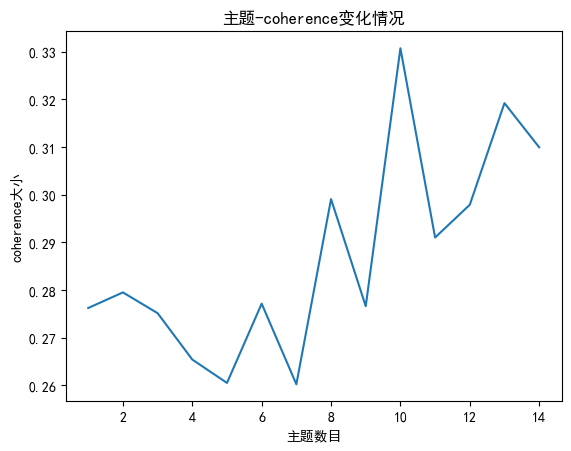

In [12]:
x = range(1,15)
y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']#配置字体以显示中文
matplotlib.rcParams['axes.unicode_minus']=False#配置轴标签
plt.title('主题-coherence变化情况')
plt.show()

In [13]:
from gensim.models import LdaModel
import pandas as pd
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
 

lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes = 30,random_state=1)
topic_list=lda.print_topics(num_topics=10, num_words=5)
print(topic_list)
 
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    print(i[bz][0])

[(0, '0.019*"br" + 0.007*"film" + 0.007*"one" + 0.007*"good" + 0.006*"movie"'), (1, '0.017*"film" + 0.016*"br" + 0.008*"one" + 0.007*"carla" + 0.006*"nt"'), (2, '0.020*"br" + 0.020*"movie" + 0.014*"film" + 0.010*"one" + 0.009*"nt"'), (3, '0.015*"br" + 0.013*"stewart" + 0.010*"jeff" + 0.010*"film" + 0.007*"gannon"'), (4, '0.017*"br" + 0.009*"ramones" + 0.009*"one" + 0.008*"film" + 0.006*"chess"'), (5, '0.047*"br" + 0.031*"movie" + 0.013*"film" + 0.010*"nt" + 0.008*"like"'), (6, '0.014*"movie" + 0.009*"br" + 0.007*"river" + 0.007*"life" + 0.006*"brother"'), (7, '0.030*"br" + 0.022*"film" + 0.008*"one" + 0.006*"like" + 0.005*"nt"'), (8, '0.027*"br" + 0.011*"film" + 0.008*"star" + 0.007*"nt" + 0.006*"luke"'), (9, '0.022*"br" + 0.014*"film" + 0.009*"one" + 0.009*"nt" + 0.008*"movie"')]
4
0
1
0
7
5
2
7
5
7
7
5
2
7
2
7
7
5
0
5
7
7
7
2
6
7
7
7
7
3
7
9
5
5
2
6
7
6
1
7
9
9
5
0
0
4
7
7
6
0
7
0
8
5
3
1
2
0
7
5
3
3
3
7
0
8
8
1
5
5
7
7
5
3
0
0
4
0
5
3
7
5
5
5
8
5
5
5
5
8
5
5
5
8
8
2
5
8
5
8
8
8
5
2


In [14]:
import pyLDAvis
import pyLDAvis.gensim
data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(data, 'lda_10.html')